In [1]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("electricity_train.csv")

In [3]:
data

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0
...,...,...,...,...,...,...,...,...
26491,34891,2017-06-23 19:00:00,-0.7,-15.0,1009.0,51.685,A,225.0
26492,34892,2017-06-23 20:00:00,-2.9,-11.4,1005.0,56.105,A,213.0
26493,34893,2017-06-23 21:00:00,-1.4,-12.9,995.0,61.275,A,213.0
26494,34894,2017-06-23 22:00:00,-2.9,-11.4,996.0,67.210,A,210.0


In [4]:
#checking null values
data.isnull().sum()

ID                         0
datetime                   0
temperature                0
var1                       0
pressure                   0
windspeed                  0
var2                       0
electricity_consumption    0
dtype: int64

<AxesSubplot:xlabel='temperature', ylabel='Density'>

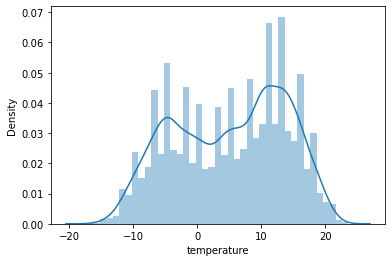

In [5]:
sns.distplot(data["temperature"])

<AxesSubplot:xlabel='var1', ylabel='Density'>

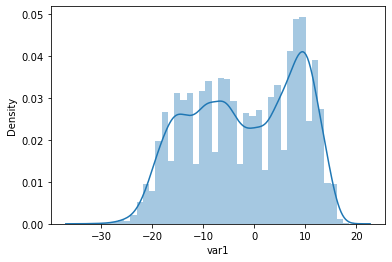

In [6]:
sns.distplot(data["var1"])

<AxesSubplot:xlabel='pressure', ylabel='Density'>

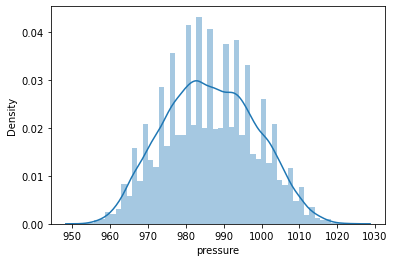

In [7]:
sns.distplot(data["pressure"])

<AxesSubplot:xlabel='windspeed', ylabel='Density'>

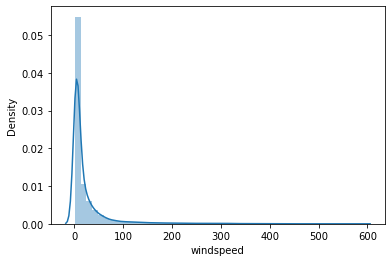

In [8]:
sns.distplot(data["windspeed"])

The data is skewed towards right

In [9]:
data["windspeed"]=np.log(data["windspeed"])

<AxesSubplot:xlabel='var2'>

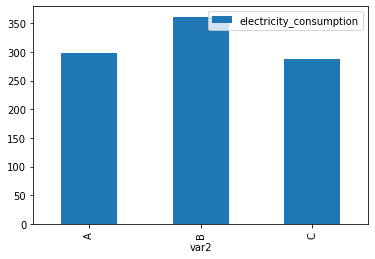

In [10]:
data[['var2',"electricity_consumption"]].groupby("var2").mean().sort_index().plot(kind='bar')

In [11]:
#Extracting useful information from the datetime feature
data["datetime"]=pd.to_datetime(data["datetime"])
data["year"]=data["datetime"].dt.year
data["month"]=data["datetime"].dt.month
data["day"]=data["datetime"].dt.day
data["day of week"]=data["datetime"].dt.dayofweek
data["hour"]=data["datetime"].dt.hour

In [12]:
data

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption,year,month,day,day of week,hour
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,6.348982,A,216.0,2013,7,1,0,0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,6.354440,A,210.0,2013,7,1,0,1
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,6.360326,A,225.0,2013,7,1,0,2
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,6.367467,A,216.0,2013,7,1,0,3
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,6.374343,A,222.0,2013,7,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26491,34891,2017-06-23 19:00:00,-0.7,-15.0,1009.0,3.945168,A,225.0,2017,6,23,4,19
26492,34892,2017-06-23 20:00:00,-2.9,-11.4,1005.0,4.027225,A,213.0,2017,6,23,4,20
26493,34893,2017-06-23 21:00:00,-1.4,-12.9,995.0,4.115372,A,213.0,2017,6,23,4,21
26494,34894,2017-06-23 22:00:00,-2.9,-11.4,996.0,4.207822,A,210.0,2017,6,23,4,22


<Figure size 864x432 with 0 Axes>

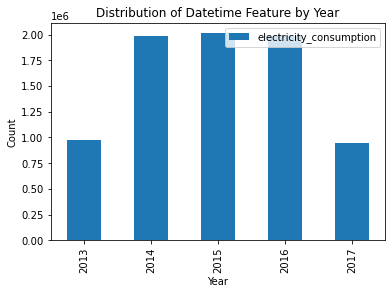

In [13]:
plt.figure(figsize=(12, 6))
data[['year',"electricity_consumption"]].groupby("year").sum().sort_index().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Datetime Feature by Year')
plt.show()

<Figure size 864x432 with 0 Axes>

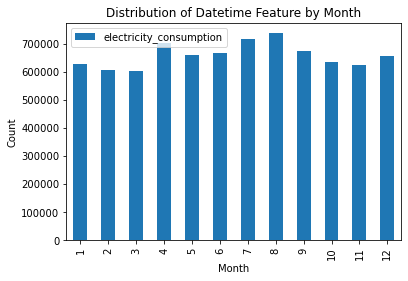

In [14]:
plt.figure(figsize=(12, 6))
data[['month',"electricity_consumption"]].groupby("month").sum().sort_index().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Distribution of Datetime Feature by Month')
plt.show()

<Figure size 864x432 with 0 Axes>

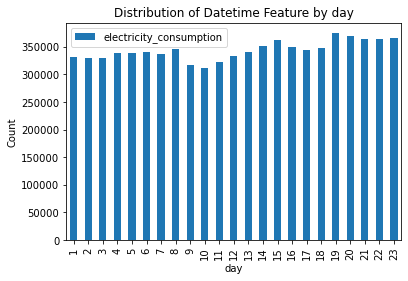

In [15]:
plt.figure(figsize=(12, 6))
data[['day',"electricity_consumption"]].groupby("day").sum().sort_index().plot(kind='bar')
plt.xlabel('day')
plt.ylabel('Count')
plt.title('Distribution of Datetime Feature by day')
plt.show()

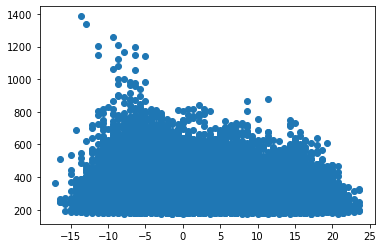

In [46]:
plt.scatter(data["temperature"],data["electricity_consumption"])

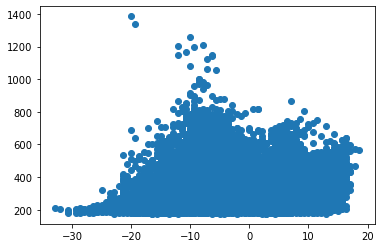

In [47]:
plt.scatter(data["var1"],data["electricity_consumption"])

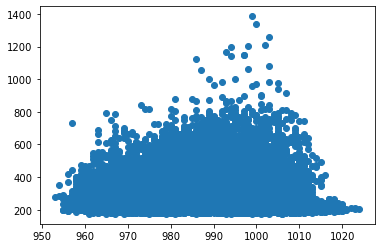

In [48]:
plt.scatter(data["pressure"],data["electricity_consumption"])

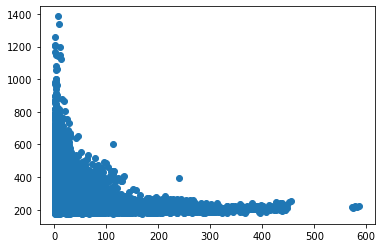

In [49]:
plt.scatter(data["windspeed"],data["electricity_consumption"])

In [16]:
#Applying cyclic encoding since the datetime feature follows a cyclic pattern
data['day_of_week_sin'] = np.sin(2 * np.pi * data['day of week'] / 7)
data['day_of_week_cos'] = np.cos(2 * np.pi * data['day of week'] / 7)
data['month_sin'] = np.sin(2 * np.pi * data['month'] / 12)
data['month_cos'] = np.cos(2 * np.pi * data['month'] / 12)
data['day_sin'] = np.sin(2 * np.pi * data['day'] / 31)
data['day_cos'] = np.cos(2 * np.pi * data['day'] / 31)
data['year_sin'] = np.sin(2 * np.pi * data['year'])
data['year_cos'] = np.cos(2 * np.pi * data['year'])
data['hour_sin'] = np.sin(2 * np.pi * data['hour'] / 24)
data['hour_cos'] = np.cos(2 * np.pi * data['hour'] / 24)
l=["day of week","month","year","day","datetime","hour"]
for i in l:
    data.drop(i,axis=1,inplace=True)


In [17]:
k=pd.get_dummies(data["var2"])


In [18]:
data=pd.concat([k,data],axis=1)

In [19]:
data.drop("var2",axis=1,inplace=True)

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Defining a function to calculate VIF
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [21]:
#Checking if multicollinarity occurs
X = data.iloc[:,:-1].drop("A",axis=1)
calc_vif(X)

,variables,VIF
0,B,1.044115
1,C,1.070197
2,ID,1.058891
3,temperature,7.830532
4,var1,8.397921
5,pressure,2.488185
6,windspeed,1.238233
7,electricity_consumption,1.596568
8,day_of_week_sin,1.001255
9,day_of_week_cos,1.003517


In [22]:
data

,A,B,C,ID,temperature,var1,pressure,windspeed,electricity_consumption,day_of_week_sin,day_of_week_cos,month_sin,month_cos,day_sin,day_cos,year_sin,year_cos,hour_sin,hour_cos
0,1,0,0,0,-11.4,-17.1,1003.0,6.348982,216.0,0.000000,1.000000,-5.000000e-01,-0.866025,0.201299,0.979530,2.565340e-14,1.0,0.000000,1.000000
1,1,0,0,1,-12.1,-19.3,996.0,6.354440,210.0,0.000000,1.000000,-5.000000e-01,-0.866025,0.201299,0.979530,2.565340e-14,1.0,0.258819,0.965926
2,1,0,0,2,-12.9,-20.0,1000.0,6.360326,225.0,0.000000,1.000000,-5.000000e-01,-0.866025,0.201299,0.979530,2.565340e-14,1.0,0.500000,0.866025
3,1,0,0,3,-11.4,-17.1,995.0,6.367467,216.0,0.000000,1.000000,-5.000000e-01,-0.866025,0.201299,0.979530,2.565340e-14,1.0,0.707107,0.707107
4,1,0,0,4,-11.4,-19.3,1005.0,6.374343,222.0,0.000000,1.000000,-5.000000e-01,-0.866025,0.201299,0.979530,2.565340e-14,1.0,0.866025,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26491,1,0,0,34891,-0.7,-15.0,1009.0,3.945168,225.0,-0.433884,-0.900969,1.224647e-16,-1.000000,-0.998717,-0.050649,-9.700862e-13,1.0,-0.965926,0.258819
26492,1,0,0,34892,-2.9,-11.4,1005.0,4.027225,213.0,-0.433884,-0.900969,1.224647e-16,-1.000000,-0.998717,-0.050649,-9.700862e-13,1.0,-0.866025,0.500000
26493,1,0,0,34893,-1.4,-12.9,995.0,4.115372,213.0,-0.433884,-0.900969,1.224647e-16,-1.000000,-0.998717,-0.050649,-9.700862e-13,1.0,-0.707107,0.707107
26494,1,0,0,34894,-2.9,-11.4,996.0,4.207822,210.0,-0.433884,-0.900969,1.224647e-16,-1.000000,-0.998717,-0.050649,-9.700862e-13,1.0,-0.500000,0.866025


In [23]:
x=data.drop(["electricity_consumption"],axis=1)
y=data["electricity_consumption"]

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [26]:
def trained_model(x):
    lr=x
    lr.fit(x_train,y_train)
    print(str(x)[:-2])
    y_pred=lr.predict(x_test)
    print("R2 score : ",lr.score(x_test,y_test))
    print("RMSE :",mean_squared_error(y_test,y_pred))
    print("Cross_val_score :",np.mean(cross_val_score(lr,x_train,y_train)))

In [27]:
trained_model(LinearRegression())

LinearRegression
R2 score :  0.3711173504234214
RMSE : 7193.725998578189
Cross_val_score : 0.37400464489730306


In [28]:
trained_model(DecisionTreeRegressor())

DecisionTreeRegressor
R2 score :  0.6371200389213321
RMSE : 4150.947735849057
Cross_val_score : 0.5341764208853009


In [35]:
trained_model(XGBRegressor())

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=Non
R2 score :  0.8180271548761266
RMSE : 2081.5692528395093
Cross_val_score : 0.7816538488360404


In [44]:
from sklearn.model_selection import GridSearchCV
model=XGBRegressor()
parameters = {'n_estimators': [100, 200, 300],
              'max_depth': [3, 5, 7],
              'learning_rate': [0.1, 0.01, 0.001]}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(model, parameters, cv=5)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)


Best parameters found:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Best score found:  0.8123409274537746


In [37]:
#preprocessing the test data to feed into our model
data=pd.read_csv("test_electricity.csv")
test=data.copy()
data["datetime"]=pd.to_datetime(data["datetime"])
data["year"]=data["datetime"].dt.year
data["month"]=data["datetime"].dt.month
data["day"]=data["datetime"].dt.day
data["day of week"]=data["datetime"].dt.dayofweek
data["hour"]=data["datetime"].dt.hour
data['day_of_week_sin'] = np.sin(2 * np.pi * data['day of week'] / 7)
data['day_of_week_cos'] = np.cos(2 * np.pi * data['day of week'] / 7)
data['month_sin'] = np.sin(2 * np.pi * data['month'] / 12)
data['month_cos'] = np.cos(2 * np.pi * data['month'] / 12)
data['day_sin'] = np.sin(2 * np.pi * data['day'] / 31)
data['day_cos'] = np.cos(2 * np.pi * data['day'] / 31)
data['year_sin'] = np.sin(2 * np.pi * data['year'])
data['year_cos'] = np.cos(2 * np.pi * data['year'])
data['hour_sin'] = np.sin(2 * np.pi * data['hour'] / 24)
data['hour_cos'] = np.cos(2 * np.pi * data['hour'] / 24)
l=["day of week","month","year","day","datetime","hour"]
for i in l:
    data.drop(i,axis=1,inplace=True)
k=pd.get_dummies(data["var2"])
data=pd.concat([k,data],axis=1)
data.drop("var2",axis=1,inplace=True)

In [38]:
test

,ID,datetime,temperature,var1,pressure,windspeed,var2
0,552,2013-07-24 00:00:00,-10.0,-16.4,1011.0,263.280,A
1,553,2013-07-24 01:00:00,-10.0,-20.7,1011.0,267.175,A
2,554,2013-07-24 02:00:00,-10.7,-17.1,1003.0,269.555,A
3,555,2013-07-24 03:00:00,-13.6,-20.7,1008.0,273.060,A
4,556,2013-07-24 04:00:00,-10.7,-17.1,1006.0,1.765,A
...,...,...,...,...,...,...,...
8563,35059,2017-06-30 19:00:00,-5.7,-18.6,998.0,233.595,A
8564,35060,2017-06-30 20:00:00,-5.7,-17.1,995.0,238.780,A
8565,35061,2017-06-30 21:00:00,-7.1,-19.3,1004.0,244.325,A
8566,35062,2017-06-30 22:00:00,-6.4,-19.3,1008.0,247.470,A


In [39]:
xgb=XGBRegressor(learning_rate=0.1, max_depth=7, n_estimators=300)
xgb.fit(x_train,y_train)
y_pred=xgb.predict(data)

In [40]:
test["electricity_consumption"]=y_pred

In [41]:
test

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
0,552,2013-07-24 00:00:00,-10.0,-16.4,1011.0,263.280,A,278.257385
1,553,2013-07-24 01:00:00,-10.0,-20.7,1011.0,267.175,A,302.065308
2,554,2013-07-24 02:00:00,-10.7,-17.1,1003.0,269.555,A,280.237915
3,555,2013-07-24 03:00:00,-13.6,-20.7,1008.0,273.060,A,395.141235
4,556,2013-07-24 04:00:00,-10.7,-17.1,1006.0,1.765,A,618.602661
...,...,...,...,...,...,...,...,...
8563,35059,2017-06-30 19:00:00,-5.7,-18.6,998.0,233.595,A,195.997208
8564,35060,2017-06-30 20:00:00,-5.7,-17.1,995.0,238.780,A,189.597137
8565,35061,2017-06-30 21:00:00,-7.1,-19.3,1004.0,244.325,A,193.472382
8566,35062,2017-06-30 22:00:00,-6.4,-19.3,1008.0,247.470,A,195.912445


In [42]:
test[["ID","electricity_consumption"]].to_csv("final_submission_electricity_consuption.csv")